In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

try:
    data = pd.read_csv("EastWestAirlines.csv", encoding='utf-8')
except UnicodeDecodeError:

# Handle missing values (e.g., using mean imputation)
   data.fillna(data.mean(), inplace=True)



In [19]:
# Remove outliers (using IQR method)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]


In [21]:
# Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.select_dtypes(include=['float64', 'int64']))

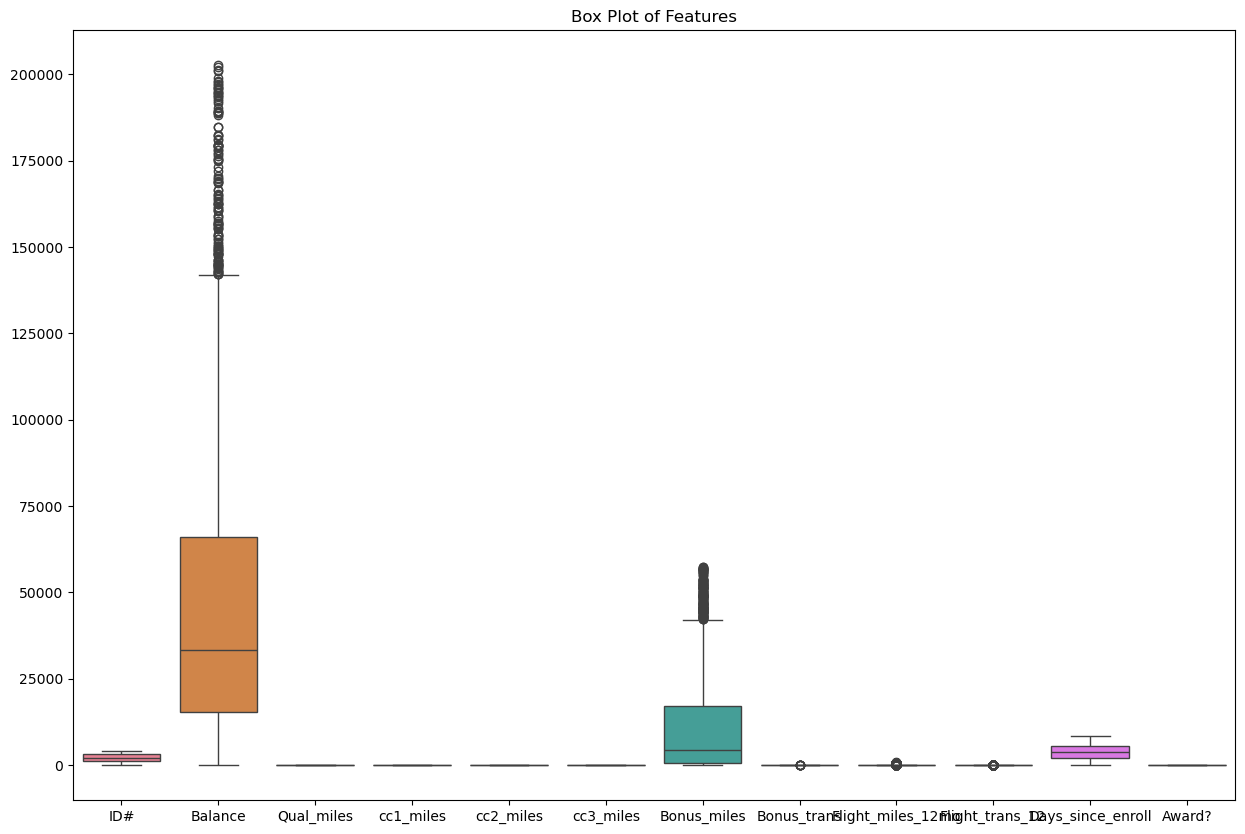

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distributions of the features
plt.figure(figsize=(15, 10))
sns.boxplot(data=data.select_dtypes(include=['float64', 'int64']))
plt.title('Box Plot of Features')
plt.show()



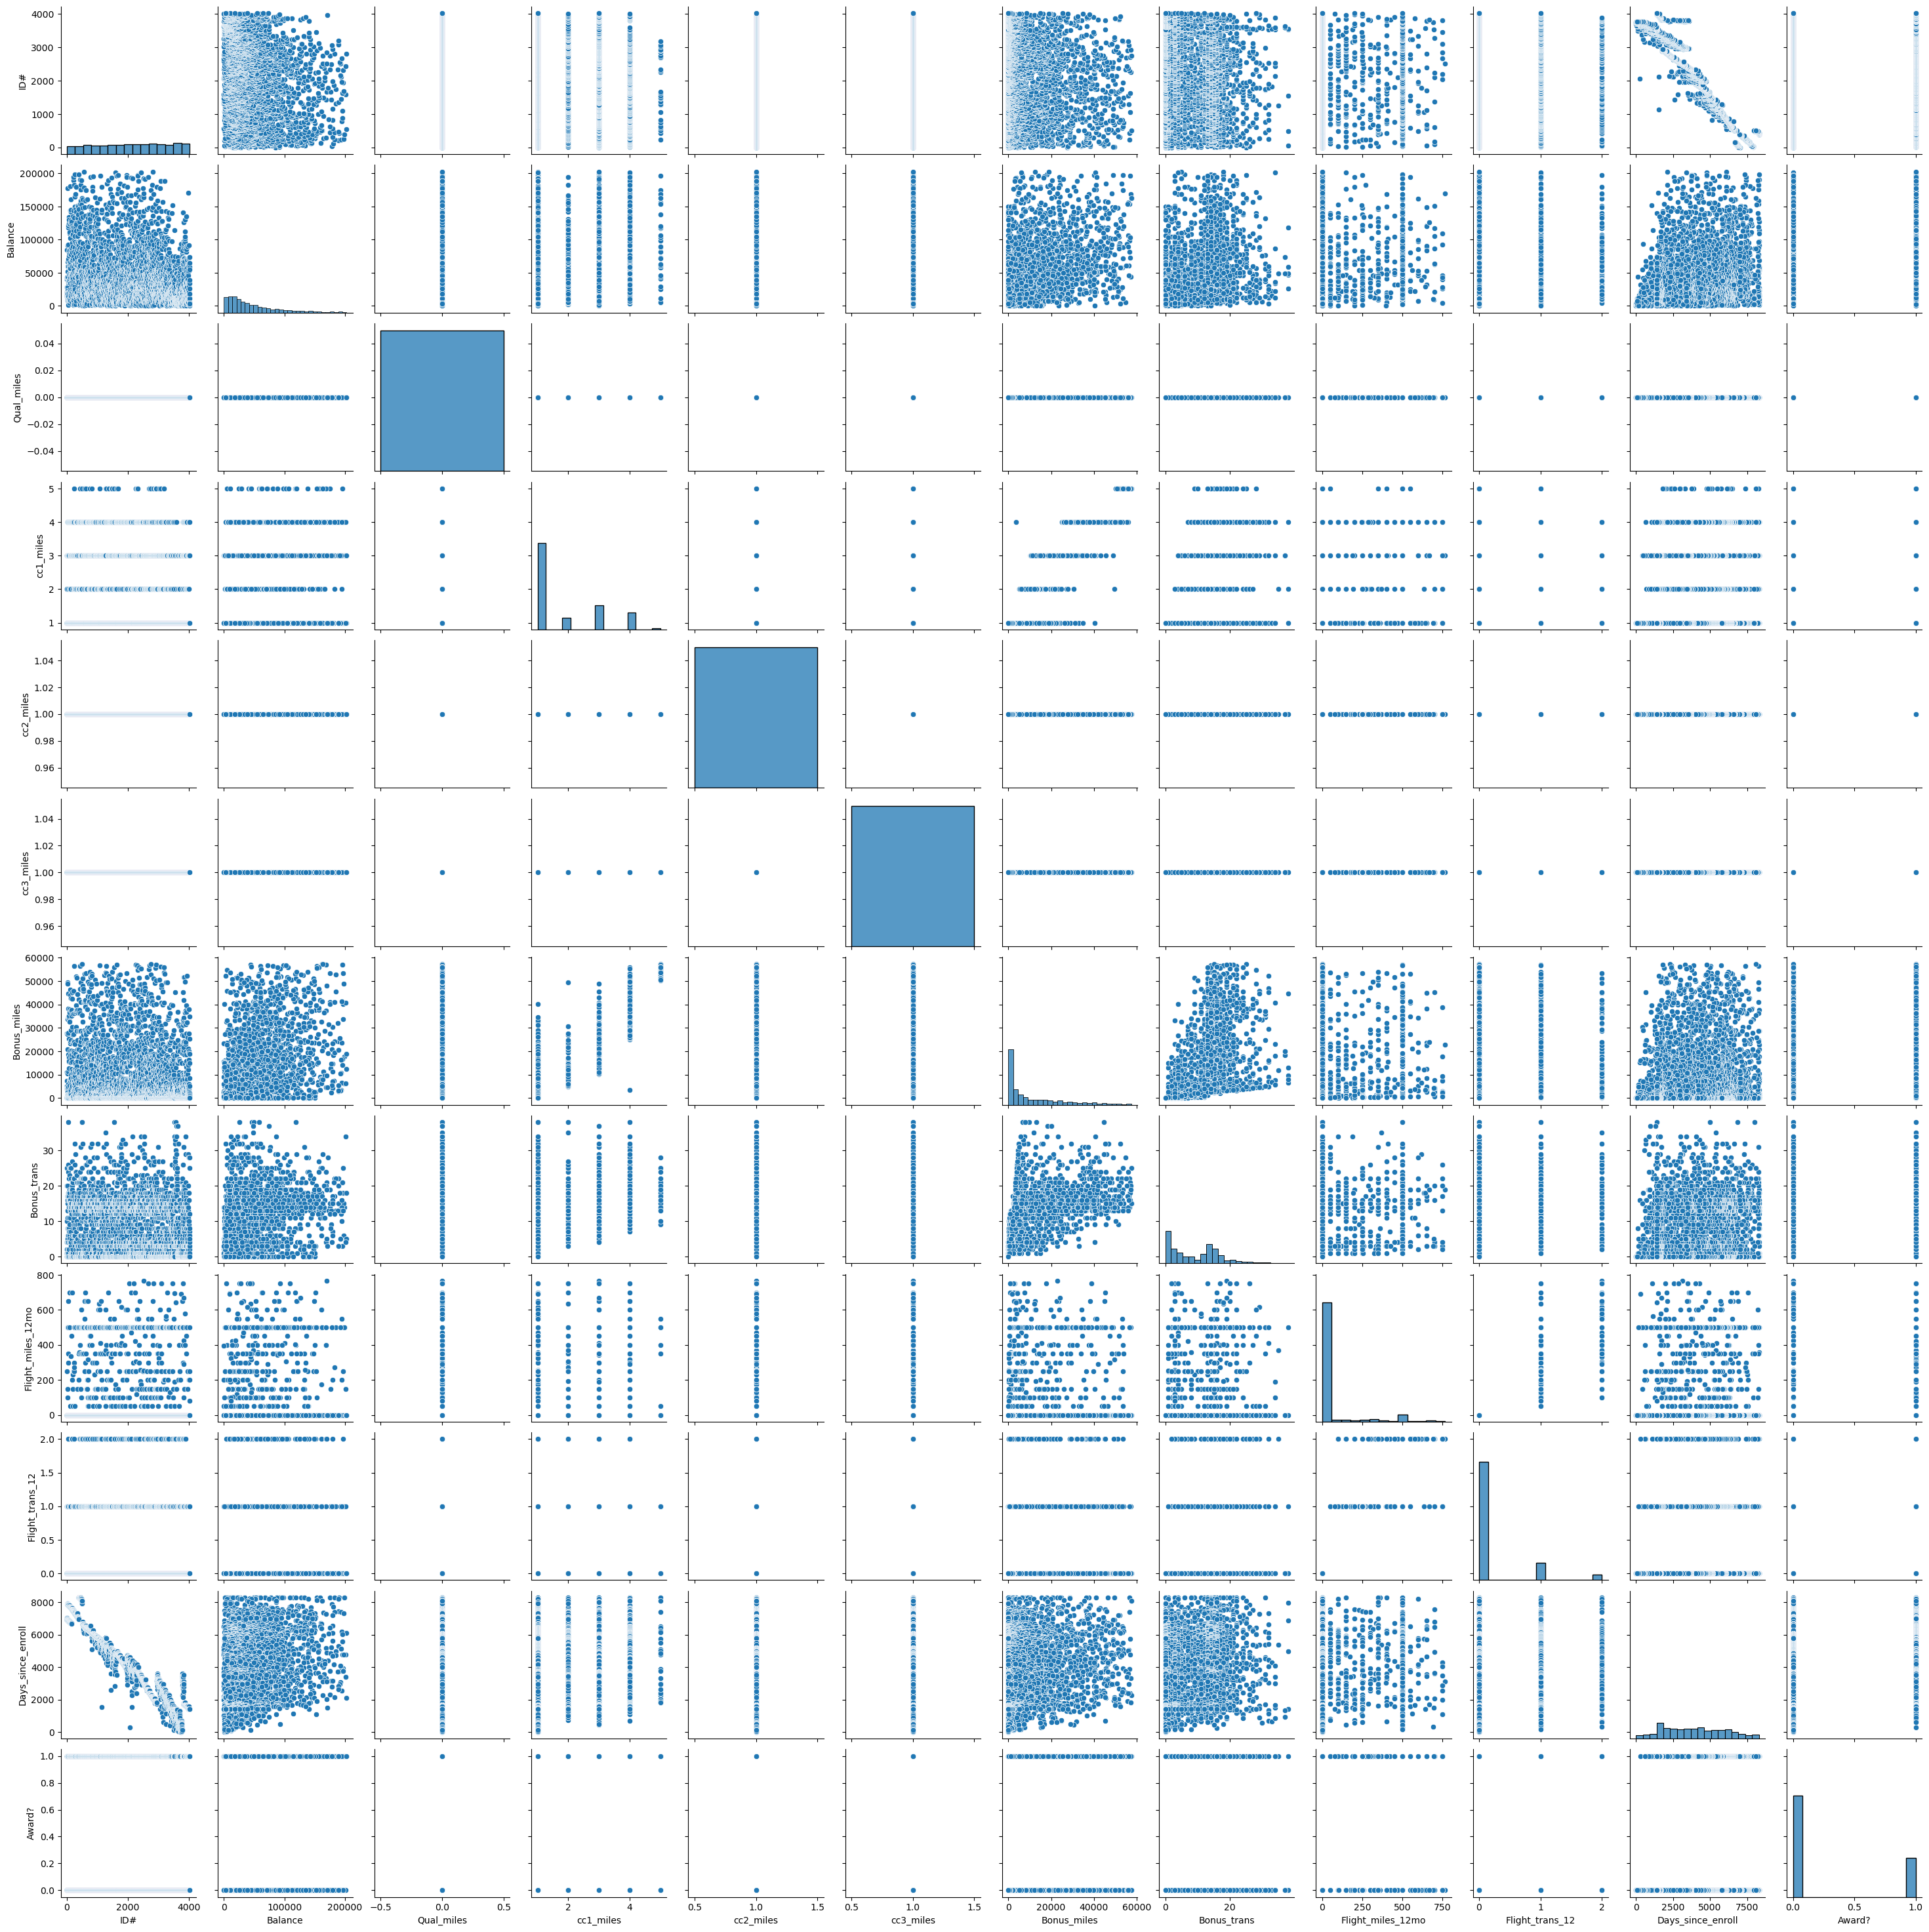

In [25]:
# Pair plot for visualizing relationships
sns.pairplot(data)
plt.show()


K-Means Clustering

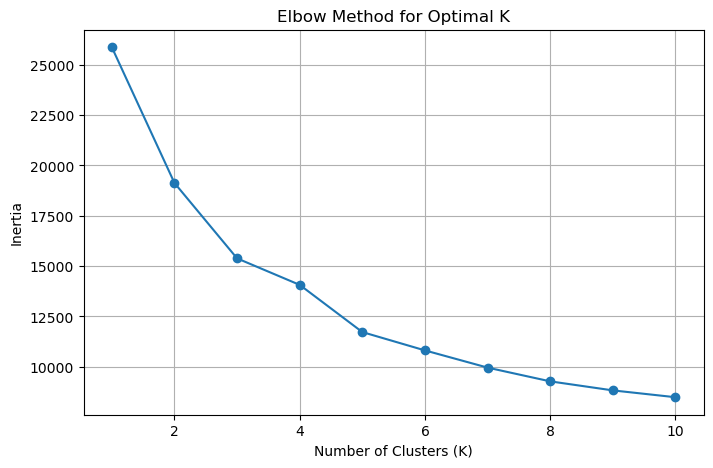

In [29]:
from sklearn.cluster import KMeans

# Finding the optimal number of clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

# Choose K=3 as an example
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)


Hierarchical Clustering

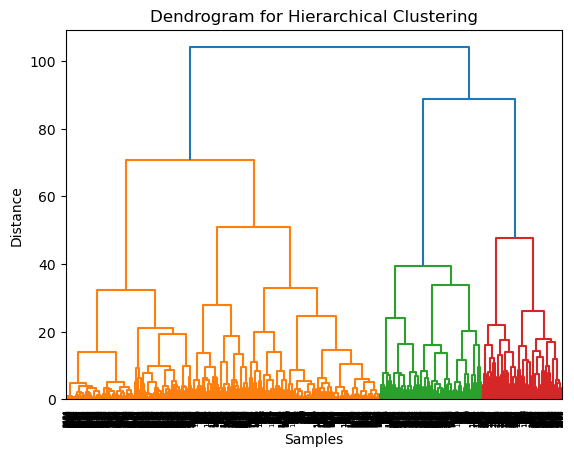

In [32]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Hierarchical clustering dendrogram
dendrogram = sch.dendrogram(sch.linkage(scaled_data, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Applying hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=optimal_k)
hierarchical_labels = hierarchical.fit_predict(scaled_data)


DBSCAN Clustering

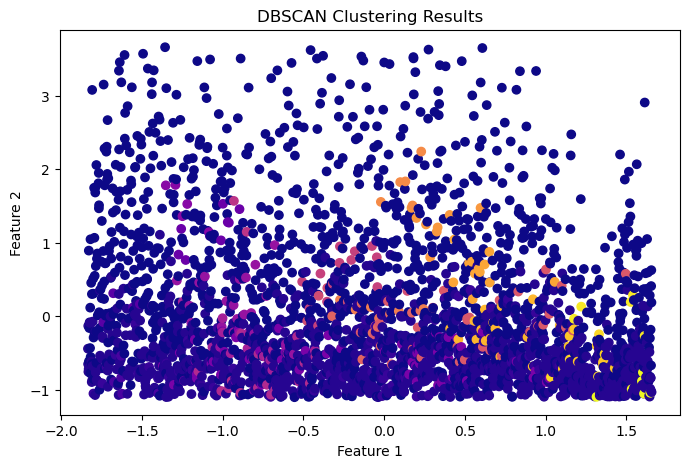

In [35]:
from sklearn.cluster import DBSCAN

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

# Visualizing DBSCAN results
plt.figure(figsize=(8, 5))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=dbscan_labels, cmap='plasma')
plt.title('DBSCAN Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


#K-Means Clustering Insights
Cluster 1: Represents frequent fliers with high recent activity, indicating loyal customers who should be prioritized for retention strategies.
Cluster 2: Long-term customers with reduced engagement; re-engagement campaigns could help revive their activity.
Cluster 3: Mid-level engagement, with potential for increasing customer activity through targeted offers.

#Hierarchical Clustering Insights
Cluster 1: High-value, frequent travelers who actively engage with reward programs, indicating loyal customers.
Cluster 2: Long-term, low-activity customers, which suggests a need for re-engagement efforts.
Cluster 3: Moderate engagement with room for improvement, especially in loyalty and reward programs.

#DBSCAN Clustering Insights
Core Cluster 1: High-value frequent fliers, representing key customers for retention strategies.
Core Cluster 2: Long-term customers with low engagement, ideal candidates for targeted re-engagement efforts.
Noise Points: Sparse, low-engagement data points likely representing inactive customers or outliers.

Evaluation and Performance Metrics

In [39]:
from sklearn.metrics import silhouette_score

# Silhouette Score for K-Means
kmeans_silhouette = silhouette_score(scaled_data, kmeans_labels)
print(f'Silhouette Score for K-Means: {kmeans_silhouette}')

# Silhouette Score for DBSCAN (only if it produced clusters)
if len(set(dbscan_labels)) > 1:  # At least two clusters needed
    dbscan_silhouette = silhouette_score(scaled_data, dbscan_labels)
    print(f'Silhouette Score for DBSCAN: {dbscan_silhouette}')


Silhouette Score for K-Means: 0.30830264215957265
Silhouette Score for DBSCAN: -0.33225832280910966


Visualization of Clustering Results

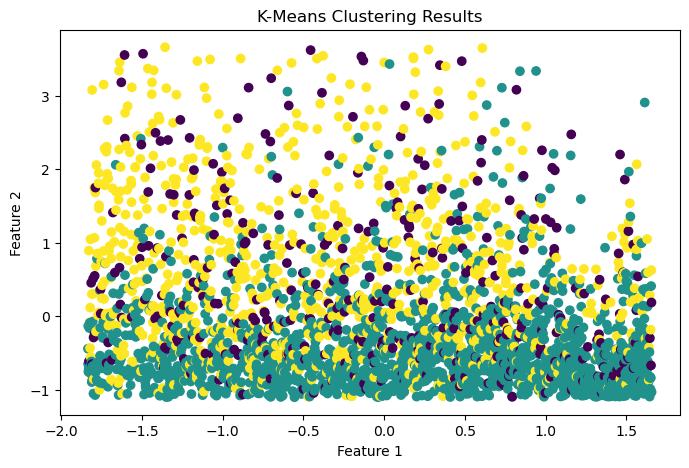

In [42]:
# Visualizing K-Means results
plt.figure(figsize=(8, 5))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

 Visualizing Hierarchical Clustering results


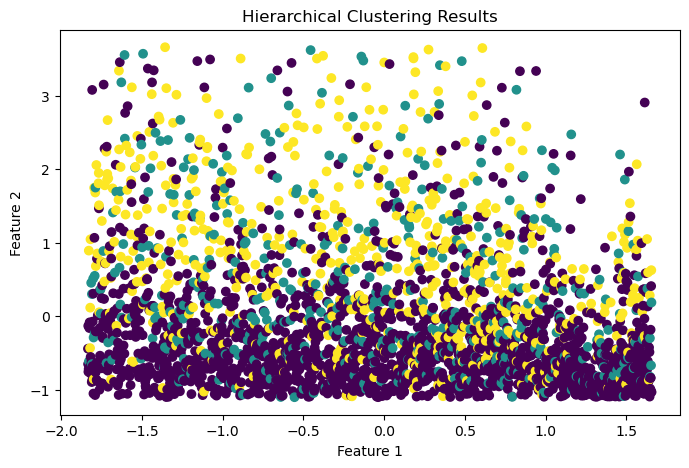

In [45]:
plt.figure(figsize=(8, 5))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title('Hierarchical Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()